In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [36]:
data = []

In [4]:
from pandas import read_csv

def get_data(filename, rowlen, delimit=','):
    df = read_csv(filename, header=None, sep=delimit, usecols=range(rowlen))
    df.to_csv('output.csv', index=False)

get_data('data.csv',1)

In [37]:
with open('output.csv', 'r') as csvfile:
  # Create a reader object
  csv_reader = csv.reader(csvfile)
  
  # Iterate through the rows in the CSV file
  for row in csv_reader:
    if row[0] != "": 
      data.append(float(row[0]))

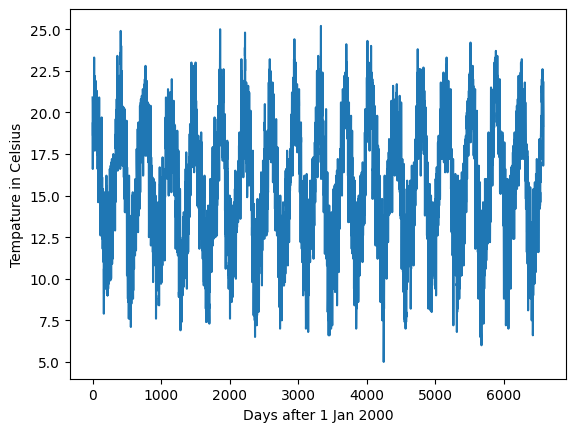

In [11]:
dates = np.arange(len(data))
fig, ax = plt.subplots()
ax.plot(dates, data)
ax.set_xlabel("Days after 1 Jan 2000")
ax.set_ylabel("Tempature in Celsius")
plt.show()

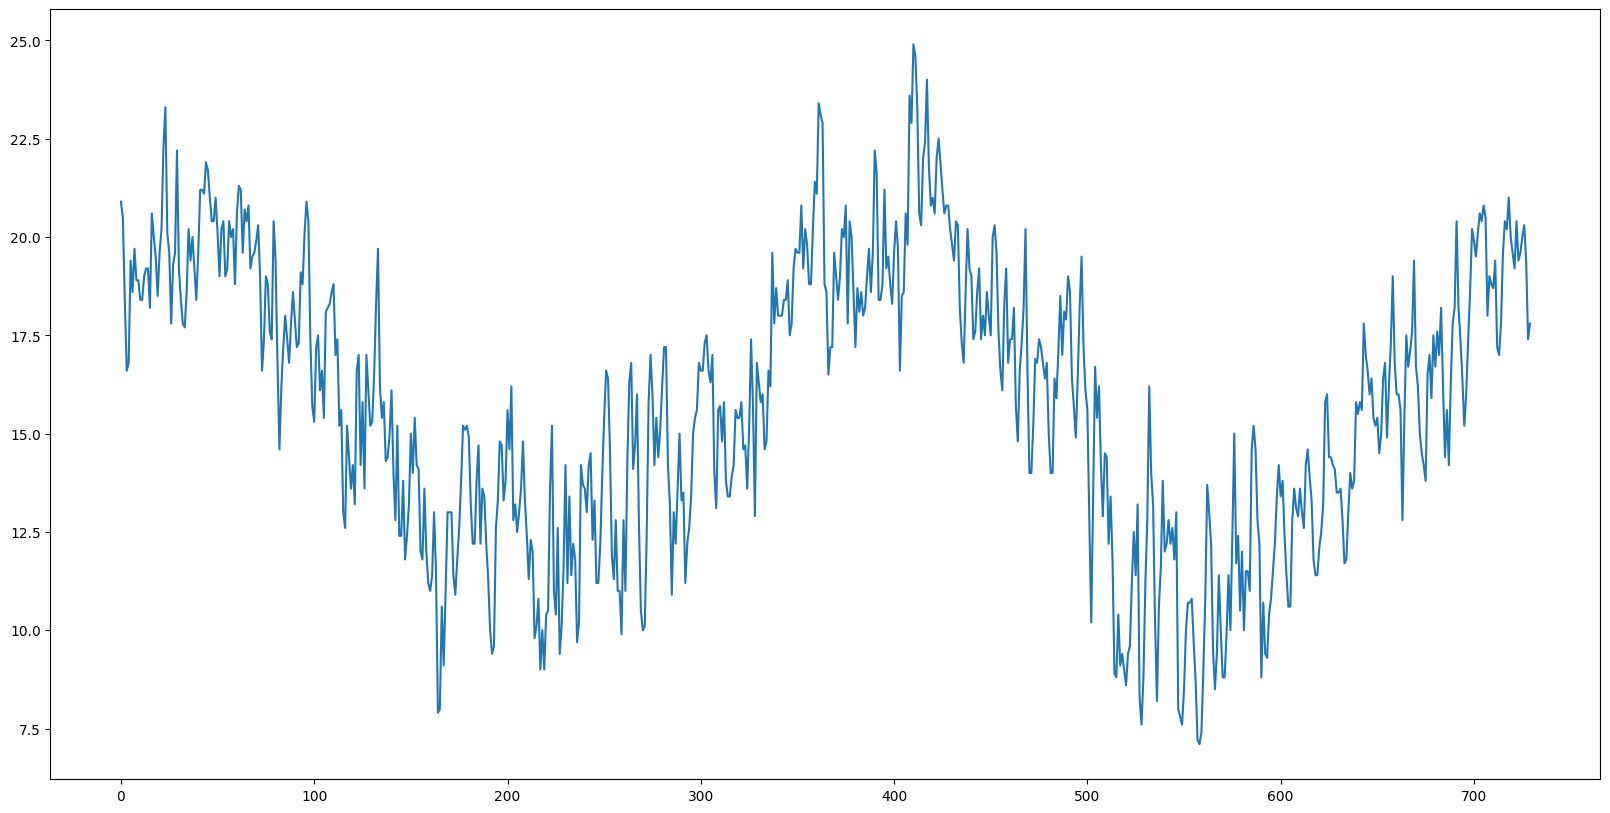

In [35]:
dates = np.arange(len(data[0:730]))
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(dates, data[0:730])
plt.show()

Magnitude: 2.137112352064572 , phase: 0.3823180070695619


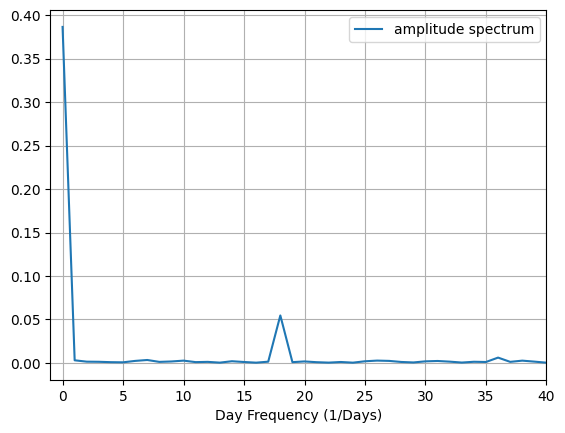

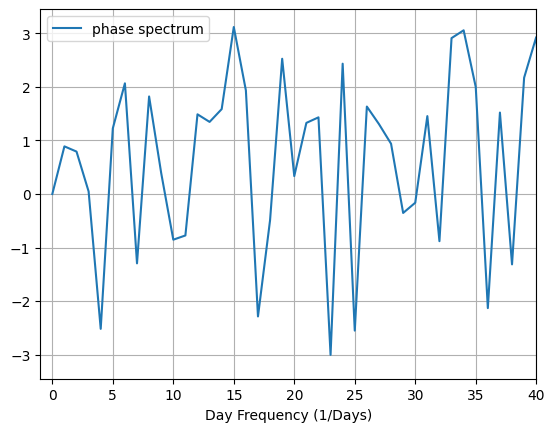

In [76]:
N = len(data)
T = 1 / len(data)

x = np.linspace(0.0, N*T, N)
y = data[0:N]

yf = np.fft.fft(y, norm='ortho')
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

freq = np.fft.fftfreq(x.size, d=T)
index, = np.where(np.isclose(freq, 200, atol=1/(T*N)))

# Get magnitude and phase
magnitude = np.abs(yf[index[0]])
phase = np.angle(yf[index[0]])
print("Magnitude:", magnitude, ", phase:", phase)

plt.xlim(-1, 40)
plt.xlabel("Day Frequency (1/Days)")

# Plot a spectrum 
plt.plot(freq[0:N//2], 2/N*np.abs(yf[0:N//2]), label='amplitude spectrum')   # in a conventional form
plt.legend()
plt.grid()
plt.show()
plt.plot(freq[0:N//2], np.angle(yf[0:N//2]), label='phase spectrum')
plt.xlabel("Day Frequency (1/Days)")
plt.xlim(-1, 40)
plt.legend()
plt.grid()
plt.show()


(array([[2.03230867e+04, 1.56651247e+04, 2.98114133e+04, ...,
         2.07078803e+04, 2.93320817e+04, 1.41537771e+04],
        [1.03465048e+04, 7.29540854e+03, 1.75631584e+04, ...,
         1.09406022e+04, 1.77510564e+04, 5.62009297e+03],
        [1.04024774e+02, 2.43310326e+01, 9.54577984e+01, ...,
         1.36039559e+01, 1.51406677e+02, 7.62915411e+01],
        ...,
        [1.10357589e-01, 5.86951356e-01, 1.89183995e+00, ...,
         1.89109531e-01, 1.08657151e-01, 1.19784805e+00],
        [9.05901719e-02, 2.45615476e+00, 1.86362199e+00, ...,
         3.68233877e-01, 7.19541797e-01, 1.04477510e+00],
        [1.14860865e-01, 1.05745666e+00, 5.23976023e-01, ...,
         1.02174853e-01, 3.58508963e-01, 2.19753663e-01]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

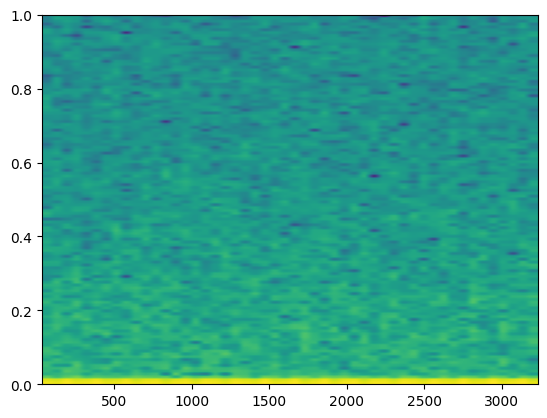

In [58]:
import matplotlib


matplotlib.pyplot.specgram()

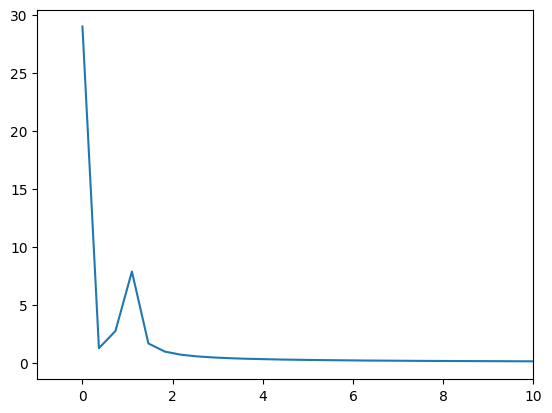

In [101]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / 365.0
x = np.linspace(0.0, N*T, N)
y = (8.75 * np.cos(2*np.pi * x)) + 15
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlim(-1, 10)
plt.show()